<a href="https://colab.research.google.com/github/Jbaruz/supervised_learning/blob/main/Support_Vector_Machines_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import sys

assert sys.version_info >= (3, 7)

In [8]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [10]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Load the data into a pandas dataframe named data_firstname
where first name is you name

In [11]:
import numpy as np
import pandas as pd

data_juan = pd.read_csv("sample_data/breast_cancer.csv")

print(data_juan)

          ID  thickness  size  shape  Marg  Epith bare  b1  nucleoli  Mitoses  \
0    1000025          5     1      1     1      2    1   3         1        1   
1    1002945          5     4      4     5      7   10   3         2        1   
2    1015425          3     1      1     1      2    2   3         1        1   
3    1016277          6     8      8     1      3    4   3         7        1   
4    1017023          4     1      1     3      2    1   3         1        1   
..       ...        ...   ...    ...   ...    ...  ...  ..       ...      ...   
694   776715          3     1      1     1      3    2   1         1        1   
695   841769          2     1      1     1      2    1   1         1        1   
696   888820          5    10     10     3      7    3   8        10        2   
697   897471          4     8      6     4      3    4  10         6        1   
698   897471          4     8      8     5      4    5  10         4        1   

     class  
0        2  
1

### Carryout some initial investigations
a.	Check the names and types of columns

In [12]:
data_juan.keys()

Index(['ID', 'thickness', 'size', 'shape', 'Marg', 'Epith', 'bare', 'b1',
       'nucleoli', 'Mitoses', 'class'],
      dtype='object')

In [13]:
data_juan.dtypes

ID            int64
thickness     int64
size          int64
shape         int64
Marg          int64
Epith         int64
bare         object
b1            int64
nucleoli      int64
Mitoses       int64
class         int64
dtype: object

 b.	Check the missing values

In [14]:
data_juan.isnull().sum()

ID           0
thickness    0
size         0
shape        0
Marg         0
Epith        0
bare         0
b1           0
nucleoli     0
Mitoses      0
class        0
dtype: int64

In [15]:
data_juan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         699 non-null    int64 
 1   thickness  699 non-null    int64 
 2   size       699 non-null    int64 
 3   shape      699 non-null    int64 
 4   Marg       699 non-null    int64 
 5   Epith      699 non-null    int64 
 6   bare       699 non-null    object
 7   b1         699 non-null    int64 
 8   nucleoli   699 non-null    int64 
 9   Mitoses    699 non-null    int64 
 10  class      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [16]:
data_juan.isnull()

,ID,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data_juan.shape

(699, 11)

c.	Check the statistics of the numeric fields (mean, min, max, median,
                                                   count..etc.)"

In [18]:
data_juan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marg,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Epith,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
b1,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [19]:
data_juan.to_string()

'           ID  thickness  size  shape  Marg  Epith bare  b1  nucleoli  Mitoses  class\n0     1000025          5     1      1     1      2    1   3         1        1      2\n1     1002945          5     4      4     5      7   10   3         2        1      2\n2     1015425          3     1      1     1      2    2   3         1        1      2\n3     1016277          6     8      8     1      3    4   3         7        1      2\n4     1017023          4     1      1     3      2    1   3         1        1      2\n5     1017122          8    10     10     8      7   10   9         7        1      4\n6     1018099          1     1      1     1      2   10   3         1        1      2\n7     1018561          2     1      2     1      2    1   3         1        1      2\n8     1033078          2     1      1     1      2    1   1         1        5      2\n9     1033078          4     2      1     1      2    1   2         1        1      2\n10    1035283          1     1      1     

# Preprocess

In [20]:
# Check if there are any '?' in the dataset
contains_question_mark = (data_juan == '?').any().any()
print("Does the dataset contain '?':", contains_question_mark)

# Count how many '?' are in the dataset
question_mark_count = (data_juan == '?').sum().sum()
print("Number of '?' in the dataset:", question_mark_count)

# Identify which columns have '?' and count them
question_marks_per_column = (data_juan == '?').sum()
print("Number of '?' per column:")
print(question_marks_per_column)

Does the dataset contain '?': True
Number of '?' in the dataset: 16
Number of '?' per column:
ID            0
thickness     0
size          0
shape         0
Marg          0
Epith         0
bare         16
b1            0
nucleoli      0
Mitoses       0
class         0
dtype: int64


3.	Replace the ‘?’ mark in the ‘bare’ column by np.nan and change the type
 to ‘float’

In [21]:
# Replace '?' with np.nan in the 'bare' column and convert to float
data_juan['bare'] = data_juan['bare'].replace('?', np.nan).astype(float)

# Print the updated column to verify changes
print(data_juan['bare'])

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
       ... 
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: bare, Length: 699, dtype: float64


In [22]:
# Identify which columns have '?' and count them
question_marks_per_column = (data_juan == '?').sum()
print("Number of '?' per column:")
print(question_marks_per_column)

Number of '?' per column:
ID           0
thickness    0
size         0
shape        0
Marg         0
Epith        0
bare         0
b1           0
nucleoli     0
Mitoses      0
class        0
dtype: int64


4.	Fill any missing data with the median of the column

In [23]:
# Check for missing values in the dataset
missing_data = data_juan.isna().sum()

# Print the result
print("Number of missing values in each column:")
print(missing_data)

Number of missing values in each column:
ID            0
thickness     0
size          0
shape         0
Marg          0
Epith         0
bare         16
b1            0
nucleoli      0
Mitoses       0
class         0
dtype: int64


In [24]:
data_juan = data_juan.fillna(data_juan.median())

In [25]:
# Check for missing values in the dataset
missing_data = data_juan.isna().sum()

# Print the result
print("Number of missing values in each column:")
print(missing_data)

Number of missing values in each column:
ID           0
thickness    0
size         0
shape        0
Marg         0
Epith        0
bare         0
b1           0
nucleoli     0
Mitoses      0
class        0
dtype: int64


5.	Drop the ID column

In [26]:
# Drop the 'ID' column from the dataset
data_juan = data_juan.drop('ID', axis=1)

# Print the DataFrame to verify that the column has been dropped
print(data_juan)

     thickness  size  shape  Marg  Epith  bare  b1  nucleoli  Mitoses  class
0            5     1      1     1      2   1.0   3         1        1      2
1            5     4      4     5      7  10.0   3         2        1      2
2            3     1      1     1      2   2.0   3         1        1      2
3            6     8      8     1      3   4.0   3         7        1      2
4            4     1      1     3      2   1.0   3         1        1      2
..         ...   ...    ...   ...    ...   ...  ..       ...      ...    ...
694          3     1      1     1      3   2.0   1         1        1      2
695          2     1      1     1      2   1.0   1         1        1      2
696          5    10     10     3      7   3.0   8        10        2      4
697          4     8      6     4      3   4.0  10         6        1      4
698          4     8      8     5      4   5.0  10         4        1      4

[699 rows x 10 columns]


In [27]:
data_juan.head()

,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


6.	Using Pandas, Matplotlib, seaborn (you can use any or a mix)
generate 3-5 plots and add them to your written response explaining
what are the key insights and findings from the plots

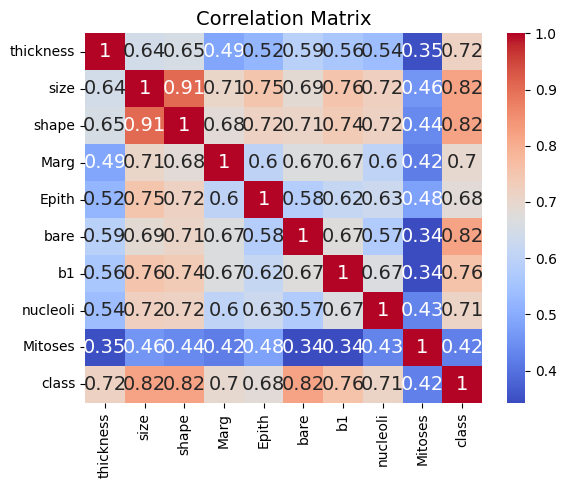

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of correlation matrix
corr = data_juan.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

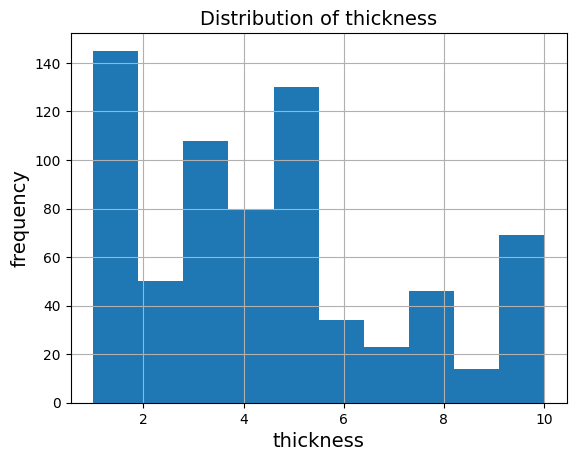

In [29]:
# Histogram
data_juan['thickness'].hist()
plt.title('Distribution of thickness')
plt.xlabel('thickness')
plt.ylabel('frequency')
#plt.savefig(r'C:\Users\Jbaru\OneDrive\Documents\MEGA\Centennial\Semester2\Supervised_learning\Assignments\Assignment#2\images_assign_2\ex1_hist.png', dpi=300)
plt.show()

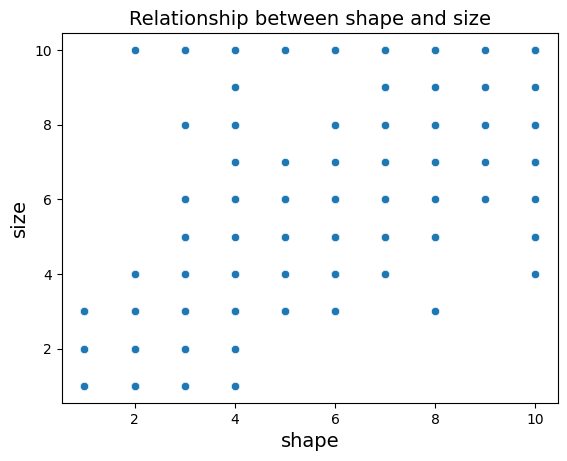

In [30]:
# Scatterplot
sns.scatterplot(x='shape', y='size', data=data_juan)
plt.title('Relationship between shape and size')
#plt.savefig(r'C:\Users\Jbaru\OneDrive\Documents\MEGA\Centennial\Semester2\Supervised_learning\Assignments\Assignment#2\images_assign_2\ex1_scatter.png', dpi=300)
plt.show()

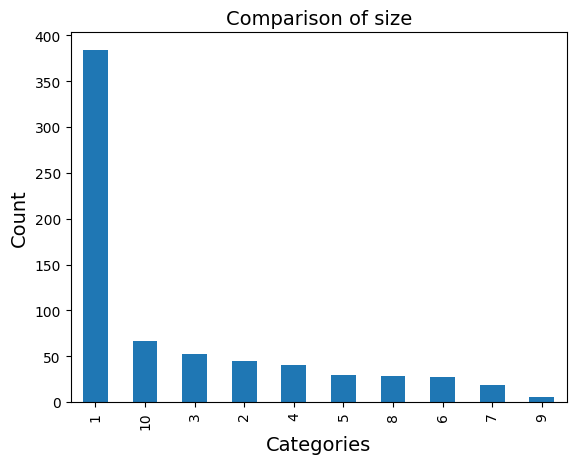

In [31]:
# Barplots
data_juan['size'].value_counts().plot(kind='bar')
plt.title('Comparison of size')
plt.xlabel('Categories')
plt.ylabel('Count')
#plt.savefig(r'C:\Users\Jbaru\OneDrive\Documents\MEGA\Centennial\Semester2\Supervised_learning\Assignments\Assignment#2\images_assign_2\ex1_barplot.png', dpi=300)
plt.show()

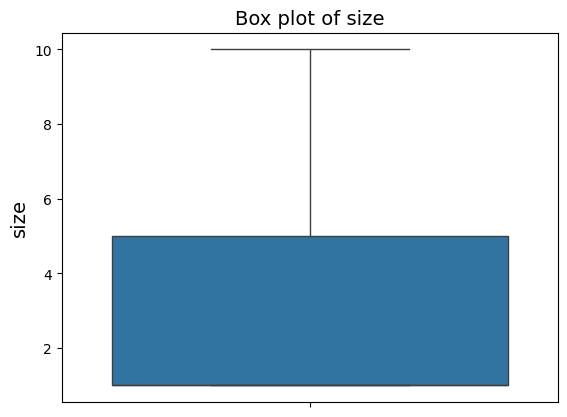

In [32]:
# Boxplots
sns.boxplot(y='size', data=data_juan)
plt.title('Box plot of size')
#plt.savefig(r'C:\Users\Jbaru\OneDrive\Documents\MEGA\Centennial\Semester2\Supervised_learning\Assignments\Assignment#2\images_assign_2\ex1_boxplot.png', dpi=300)
plt.show()

7.	Separate the features from the class

In [33]:
data_juan.keys()

Index(['thickness', 'size', 'shape', 'Marg', 'Epith', 'bare', 'b1', 'nucleoli',
       'Mitoses', 'class'],
      dtype='object')

In [34]:
X = data_juan.drop('class', axis=1)
y = data_juan['class']

In [35]:
X.keys()

Index(['thickness', 'size', 'shape', 'Marg', 'Epith', 'bare', 'b1', 'nucleoli',
       'Mitoses'],
      dtype='object')

8.	Split your data into train 80% train and 20% test, use the last
 two digits of your student number for the seed

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

9.	Train an SVM classifier using the training data, set the kernel to
 linear and set the regularization parameter to C= 0.1. Name the classifier
 clf_linear_firstname.

In [37]:
from sklearn.svm import SVC
clf_linear_juan = SVC(kernel='linear', C=0.1)

In [38]:
# train the classifier
clf_linear_juan.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

10.	Print out two accuracy score one for the model on the training set
 i.e. X_train, y_train and the other on the testing set i.e. X_test, y_test.
 Record both results in your written response.

In [39]:
train_accuracy = clf_linear_juan.score(X_train, y_train)
test_accuracy = clf_linear_juan.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 96.96%
Testing Accuracy: 96.43%


11.	Generate the accuracy matrix. Record the results in your written response.
Support vector machine classifier with “rbf” kernel

In [40]:
y_pred = clf_linear_juan.predict(X_test)

In [41]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[92  3]
 [ 2 43]]


In [42]:
# compute accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 96.43%


In [43]:
# compute cross_validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_linear_juan, X, y, cv=3, scoring="accuracy")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Cross-Validation Score: {scores.mean()*100:.2f}%")

Cross-Validation Scores: [0.93991416 0.96995708 0.98283262]
Average Cross-Validation Score: 96.42%


12.	Repeat steps 9 to 11, in step 9 change the kernel to “rbf” and do not
set any value for C

In [44]:
# Step 9: Train an SVM classifier with "rbf" kernel
clf_rbf_juan = SVC(kernel='rbf')


In [45]:
# train SVM classifier
clf_rbf_juan.fit(X_train, y_train)

SVC()

In [46]:
# Step 10: Print out two accuracy scores
train_accuracy = clf_rbf_juan.score(X_train, y_train)
test_accuracy = clf_rbf_juan.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 97.32%
Testing Accuracy: 97.86%


In [47]:
# Step 11: Generate the confusion matrix and cross-validation scores
y_pred = clf_rbf_juan.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cv_scores = cross_val_score(clf_rbf_juan, X, y,cv=3, scoring="accuracy")
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Average Cross-Validation Score: {cv_scores.mean()*100:.2f}%")

Confusion Matrix:
[[93  2]
 [ 1 44]]
Cross-Validation Scores:
[0.93133047 0.96566524 0.98712446]
Average Cross-Validation Score: 96.14%


14.	Repeat steps 9 to 11, in step 9 change the kernel to “sigmoid” and
do not set any value for C

In [48]:
# Step 9: Train an SVM classifier with "sigmoid" kernel
clf_sigmoid_juan = SVC(kernel='sigmoid')
# Train the classifier
clf_sigmoid_juan.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [49]:
# Step 10: Print out two accuracy scores
train_accuracy = clf_sigmoid_juan.score(X_train, y_train)
test_accuracy = clf_sigmoid_juan.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 43.29%
Testing Accuracy: 42.14%


In [50]:
# Step 11: Generate the confusion matrix and cross-validation scores
y_pred = clf_sigmoid_juan.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cv_scores = cross_val_score(clf_sigmoid_juan, X, y,cv=3, scoring="accuracy")
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Average Cross-Validation Score: {cv_scores.mean()*100:.2f}%")

Confusion Matrix:
[[59 36]
 [45  0]]
Cross-Validation Scores:
[0.38197425 0.41630901 0.49356223]
Average Cross-Validation Score: 43.06%


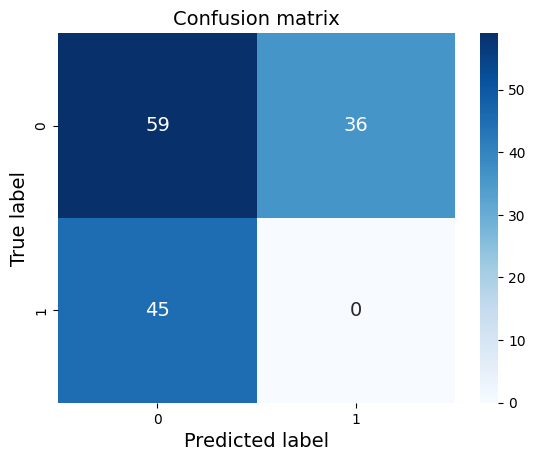

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.show()

# Example usage after predicting with a model
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['shape', 'size'])
